In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv('car_data.csv')
# df.head()
df_copy=df.copy()

In [54]:
df_copy.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [55]:
df_copy.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [57]:
df_copy.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [58]:
df_copy.duplicated().sum()

np.int64(2)

In [59]:
df_copy=df_copy.drop_duplicates()

In [60]:
df_copy.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [61]:
df_copy['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

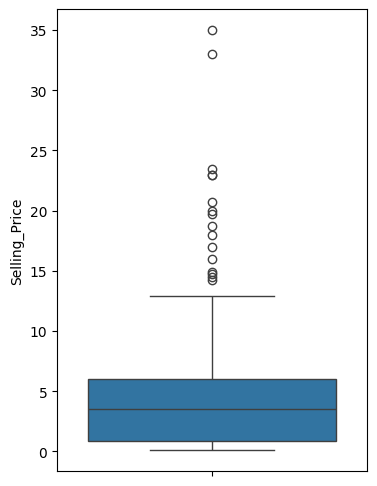

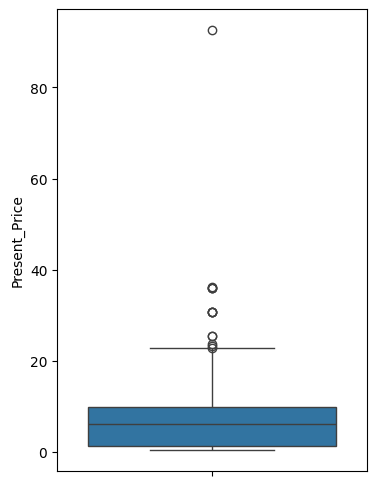

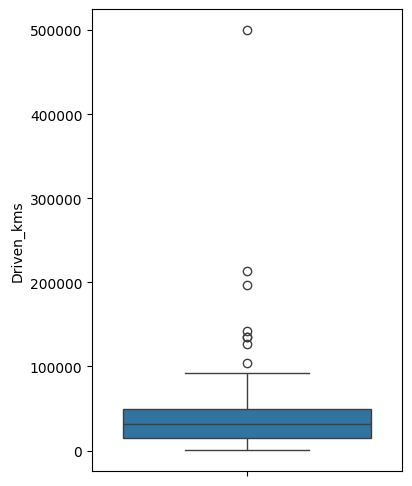

In [62]:
numeric_columns=[ 'Selling_Price', 'Present_Price', 'Driven_kms']
for col in numeric_columns:
    plt.figure(figsize=(4,6))
    sns.boxplot(df_copy[col])
# sns.boxplot(data=df[numeric_columns])
# plt.show()


In [63]:
# handle outlier by inter quartile range.

numeric_columns = ['Selling_Price', 'Present_Price', 'Driven_kms']

for col in numeric_columns:
    # 1 Calculate Q1, Q3 and IQR
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 2 Define Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 3 Handle Outliers 
    
    # Trimming (Removing the rows)
    # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    # Capping/Winsorization (Recommended for car price data)
    # This replaces outliers with the boundary values instead of deleting data
    df_copy[col] = df_copy[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers handled using Capping.")

Outliers handled using Capping.


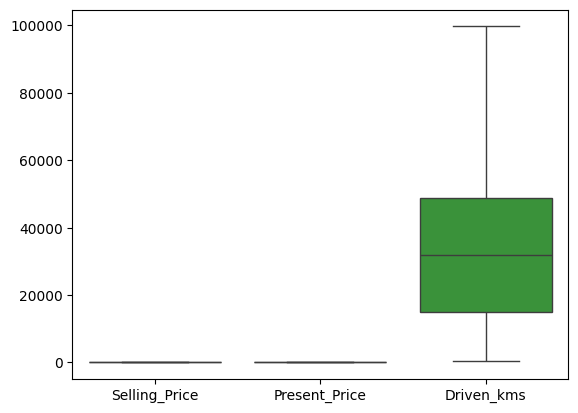

In [64]:
# After check using a Boxplot
sns.boxplot(data=df_copy[numeric_columns])
plt.show()

In [65]:
df_copy

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988.0,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000.0,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934.0,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000.0,Diesel,Dealer,Manual,0


In [66]:
df_copy['Car_Name'].value_counts()


Car_Name
city                  26
corolla altis         16
verna                 14
brio                  10
fortuner              10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [67]:
!pip install category-encoders


In [ ]:
from category_encoders import BinaryEncoder
de = BinaryEncoder(cols=['Car_Name'])
df_copy=de.fit_transform(df_copy)
# binary encoder lai  enode garne---> firta halne __

In [78]:
df_copy.head()

,Car_Name_0,Car_Name_1,Car_Name_2,Car_Name_3,Car_Name_4,Car_Name_5,Car_Name_6,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,0,0,0,0,0,0,1,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,0,0,0,0,0,1,0,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,0,0,0,0,0,1,1,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,0,0,0,0,1,0,0,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,0,0,0,0,1,0,1,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [79]:
cat_col=['Fuel_Type', 'Selling_type', 'Transmission']
# one hot encoding
df_final = pd.get_dummies(df_copy, columns=cat_col, drop_first=True)

In [80]:
print("Final Shape:", df_final.shape)
print(df_final.head())

Final Shape: (299, 16)
   Car_Name_0  Car_Name_1  Car_Name_2  Car_Name_3  Car_Name_4  Car_Name_5  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           1   
2           0           0           0           0           0           1   
3           0           0           0           0           1           0   
4           0           0           0           0           1           0   

   Car_Name_6  Year  Selling_Price  Present_Price  Driven_kms  Owner  \
0           1  2014           3.35           5.59     27000.0      0   
1           0  2013           4.75           9.54     43000.0      0   
2           1  2017           7.25           9.85      6900.0      0   
3           0  2011           2.85           4.15      5200.0      0   
4           1  2014           4.60           6.87     42450.0      0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  \
0             F

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split into features (X) and target (y)
X = df_final.drop('Selling_Price', axis=1)
y = df_final['Selling_Price']

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train
model = LinearRegression()
model.fit(X_train, y_train)

print("Training Complete! Model Accuracy (R2):", model.score(X_test, y_test))

Training Complete! Model Accuracy (R2): 0.7263400815628334


In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Get predictions for the test set
y_pred = model.predict(X_test)

# 2. Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"--- Model Evaluation Metrics ---")
print(f"R2 Score (Accuracy): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} ")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} ")

--- Model Evaluation Metrics ---
R2 Score (Accuracy): 0.7263
Mean Absolute Error (MAE): 1.11 
Root Mean Squared Error (RMSE): 1.93 


In [93]:
def predict_from_array(input_array):
    # Column names in the order they appear in your original CSV (minus the target)
    feature_cols = ['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
    
    # 1. Create a DataFrame from the array
    input_df = pd.DataFrame([input_array], columns=feature_cols)
    
    # 2. Fix the "Unexpected input dimension" error
    # Your encoder 'de' expects 9 columns because it was trained on the whole CSV.
    # We add a dummy Selling_Price column to satisfy the encoder.
    input_df['Selling_Price'] = 0 
    
    # 3. Apply Binary Encoding using your 'de' object
    input_encoded = de.transform(input_df)
    
    # 4. Remove the dummy Selling_Price column before predicting
    if 'Selling_Price' in input_encoded.columns:
        input_encoded = input_encoded.drop('Selling_Price', axis=1)
    
    # 5. Apply One-Hot Encoding for the other categories
    # Note: Fuel_Type, Selling_type, Transmission
    input_encoded = pd.get_dummies(input_encoded, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
    
    # 6. Align columns with X_train (ensure all 0/1 columns exist)
    for col in X_train.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
            
    # Ensure the order is EXACTLY the same as training
    input_encoded = input_encoded[X_train.columns]
    
    # 7. Predict
    prediction = model.predict(input_encoded)
    return prediction[0]

# --- EXAMPLE USAGE ---
# Format: ['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
my_car = ['ciaz', 2017, 9.85, 6900, 'Petrol', 'Dealer', 'Manual', 0]

result = predict_from_array(my_car)
print(f"Predicted Price for the input array: {result:.2f} Lakhs")

Predicted Price for the input array: 6.72 Lakhs


In [94]:
# 